# IMPORTS

In [1]:
import os
import warnings
import datetime 

import matplotlib as mpl
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import xesmf as xe
import numpy as np
import matplotlib.colors as colors
import glob

# Set to True to suppress warnings
SuppressWarnings = True
# Set to True to suppress plots
SuppressPlots = False

## Suppress Warnings
# Ignore warnings if SuppressWarnings is True
if SuppressWarnings:
    warnings.filterwarnings("ignore")

# Use Agg backend to suppress plot display if SuppressPlots is True
if SuppressPlots:
    import matplotlib
    matplotlib.use("Agg")

# Printing current date and library versions
print(datetime.datetime.ctime(datetime.datetime.today()))  # Print current date and time
print("Matplotlib: ", mpl.__version__)  # Print Matplotlib version
print("Numpy     : ", np.__version__)  # Print NumPy version
print("Pandas   : ", pd.__version__)  # Print Pandas version
print("Xarray   : ", xr.__version__)  # Print Xarray version

Mon Apr  1 10:01:30 2024
Matplotlib:  3.7.3
Numpy     :  1.24.4
Pandas   :  2.0.3
Xarray   :  2023.6.0


# FUNCTIONS

In [2]:
# Define a function to plot data on a map projection
def plot_projection(X, Y, Z, title):
    # Create a figure with specified size
    fig = plt.figure(figsize=(11, 6.5))

    # Set the axes using the Robinson projection
    ax = plt.axes(projection=ccrs.Robinson())

    # Set the colormap and normalization
    cmap = plt.get_cmap('coolwarm')
    norm = colors.Normalize(vmin=-2, vmax=38)

    # Add cyclic point to the data for smooth plotting
    Z, lons = add_cyclic_point(Z, coord=X)

    # Plot the data using contourf
    cs = ax.contourf(lons, Y, Z, levels=10, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

    # Add coastlines to the plot
    ax.coastlines()

    # Add colorbar to the plot
    cbar = plt.colorbar(cs, shrink=0.6, orientation='horizontal', label='SST (Celsius)')

    # Set the title of the plot
    plt.title(title)

    # Display the plot
    plt.show()

# Define new latitude and longitude arrays
new_lat = np.arange(-90, 90.5, 1)
new_lon = np.arange(0, 360, 1)

# MODEL CASES

In [3]:
# The LEEDS data are in a different timestep (daily) than the other model cases. Therefore, the LEEDS model processing is done outside of these model cases.

| Model CASE | Variable Name |
| --- | --- |
| CCSM4  | ds1 |
| CESM 1.2  | ds2 |
| CESM2 | ds3 |
| COSMOS | ds4 |
| EC-Earth 3.3 | ds5 |
| HADGEM3 NEW 1997 | ds6  |
| IPSLCM5-LR  | ds7 |
| IPSLCM5-LR 2.1 | ds8 |
| MIROC4 2004 | ds9 |
| Utrecht CESM1.0.5  | ds10 |
| IPSLCM6A_LR  | ds11 |
| GISS  | ds12 |
| NorESM-F  | ds13 |

## #1 CCSM4 (B40) Annual Mean Pliocene Sea Surface Temperature (No Custom Mask)

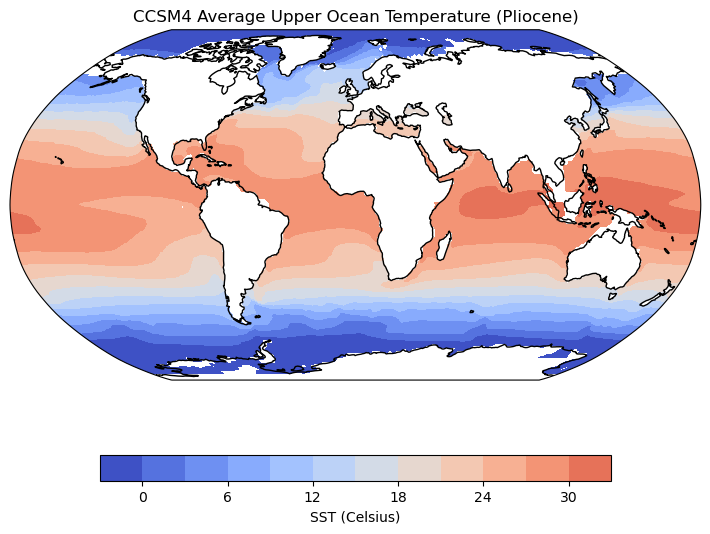

In [4]:
# Setting the file path and name
path1 = '/glade/campaign/univ/ugmu0029/PlioMIP2/NCAR/'  # Path to the directory containing the file
fname1 = 'b40.B1850.f09_g16.PMIP4-pliomip2.pop.h.TEMP.1001-1100.annavg.nc'  # Name of the file to open

# Open the dataset using xarray and concatenate the dimensions
ds1 = xr.open_dataset(path1 + fname1)

# Squeeze the dataset to remove singleton dimensions
ds1 = ds1.squeeze()

# Convert z_t variable to meters (divide by 100)
ds1['z_t'] = ds1['z_t'] * (1/100)

# Rename variables TLONG and TLAT to lon and lat, respectively
ds1 = ds1.rename({'TLONG': 'lon', 'TLAT': 'lat', 'z_t':'lev'})

# Create a new dataset with desired lat and lon coordinates
ds1_out = xr.Dataset({'lat': (['lat'], new_lat),
                      'lon': (['lon'], new_lon)
                     })

# Create a regridder object using the source dataset (ds1) and the destination dataset (ds1_out)
regridder = xe.Regridder(ds1, ds1_out, 'nearest_s2d')

# Regrid the 'TEMP' variable using the regridder and convert it to a dataset
dr1_out = regridder(ds1['TEMP']).to_dataset(name='TEMP')

# Plotting
plot_projection(
    dr1_out.lon,
    dr1_out.lat,
    dr1_out['TEMP'][0, :, :],
    title="CCSM4 Average Upper Ocean Temperature (Pliocene)"
)

## #2 CESM 1.2 Annual Mean Pliocene Sea Surface Temperature (No Custom Mask)

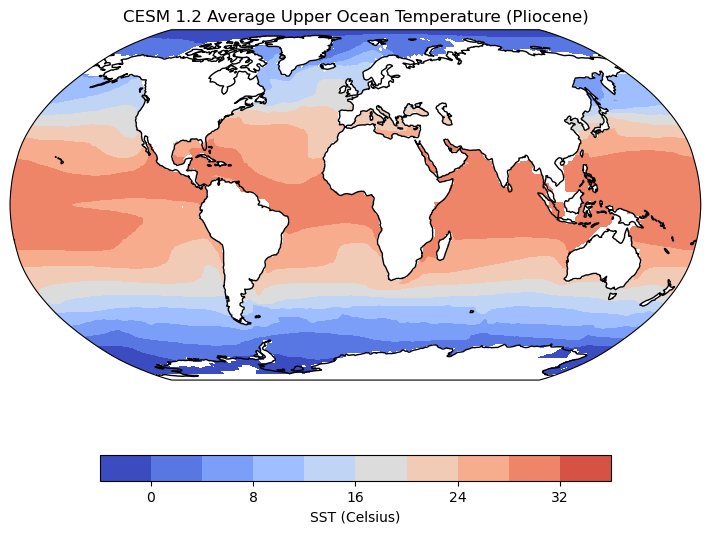

In [5]:
# CESMModel 1.2 (b.e12) data
path2 = '/glade/campaign/univ/ugmu0029/PlioMIP2/NCAR/'  # Path to the directory containing the file
fname2 = 'b.e12.B1850.f09_g16.PMIP4-pliomip2.pop.h.TEMP.1100-1199.annavg.nc'  # Name of the file to open

# Open the dataset using xarray and concatenate the dimensions
ds2 = xr.open_dataset(path2 + fname2)

# Squeeze the dataset to remove singleton dimensions
ds2 = ds2.squeeze()

# Convert z_t variable to meters (divide by 100)
ds2['z_t'] = ds2['z_t'] * (1/100)

# Rename variables TLONG and TLAT to lon and lat, respectively
ds2 = ds2.rename({'TLONG': 'lon', 'TLAT': 'lat', 'z_t':'lev'})

# Create a new dataset with desired lat and lon coordinates
ds2_out = xr.Dataset({'lat': (['lat'], new_lat),
                      'lon': (['lon'], new_lon)
                     })

# Create a regridder object using the source dataset (ds2) and the destination dataset (ds2_out)
regridder = xe.Regridder(ds2, ds2_out, 'nearest_s2d')

# Regrid the 'TEMP' variable using the regridder and convert it to a dataset
dr2_out = regridder(ds2['TEMP']).to_dataset(name='TEMP')

# Plotting
plot_projection(
    dr2_out.lon,
    dr2_out.lat,
    dr2_out['TEMP'][0, :, :],
    title="CESM 1.2 Average Upper Ocean Temperature (Pliocene)"
)

## #3 CESM2 Annual Mean Pliocene Sea Surface Temperature (No Custom Mask)

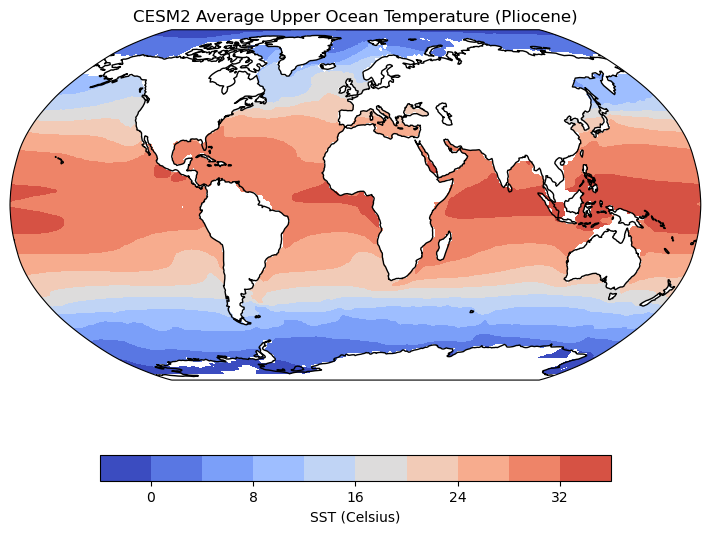

In [6]:
# Specify the file path and name of the dataset
path3 = '/glade/campaign/univ/ugmu0029/PlioMIP2/NCAR/'  # Directory containing the file
fname3 = 'b.e21.B1850.f09_g16.PMIP4-pliomip2.pop.h.TEMP.1100-1199.annavg.nc'  # Name of the file to open

# Open the dataset using xarray and squeeze the dimensions
ds3 = xr.open_dataset(path3 + fname3)
ds3 = ds3.squeeze()

# Convert z_t variable to meters (divide by 100)
ds3['z_t'] = ds3['z_t'] * (1/100)

# Rename the dimensions from TLONG and TLAT to lon and lat
ds3 = ds3.rename({'TLONG': 'lon', 'TLAT': 'lat', 'z_t' :'lev'})

# Create a new dataset for regridding with desired lat and lon coordinates
ds3_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds3, ds3_out, 'nearest_s2d')

# Perform regridding on the TEMP variable and convert to dataset
dr3_out = regridder(ds3['TEMP']).to_dataset(name='TEMP')

# Plotting
plot_projection(
    dr3_out['lon'],  # Longitude data
    dr3_out['lat'],  # Latitude data
    dr3_out['TEMP'][0, :, :],  # Temperature data for the first time step
    title="CESM2 Average Upper Ocean Temperature (Pliocene)"  # Title of the plot
)

## #4 COSMOS Annual Mean Pliocene Sea Surface Temperature

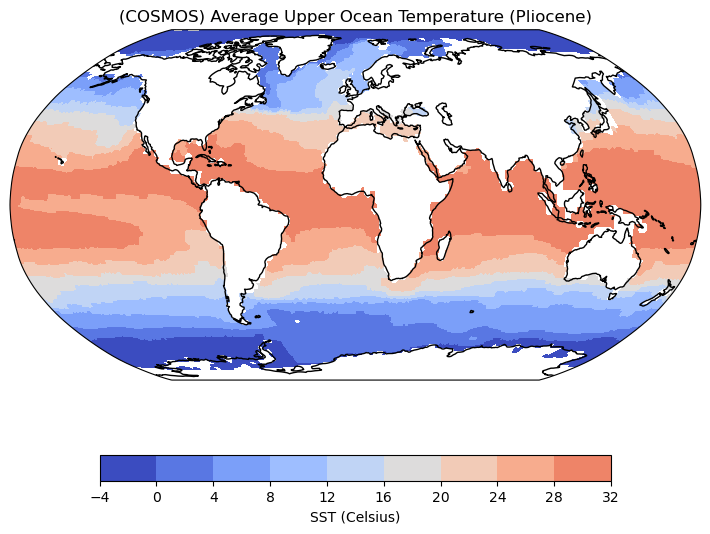

In [7]:
# Specify the file path and name of the dataset
path4 = '/glade/campaign/univ/ugmu0029/PlioMIP2/AWI/COSMOS/Eoi400/'
fname4 = 'Eoi400.THO_CMIP6_name_thetao_2650-2749_multiyear_monthly_mean_remapcon_r360x180.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds4 = xr.open_dataset(path4 + fname4, decode_times=False)

# Calculate the mean along the 'time' dimension
ds4 = ds4.mean('time')

# Rename the lon and lat dimensions
ds4 = ds4.rename({'plev':'lev', 'thetao':'TEMP'})

# Create a new dataset for regridding with desired lat and lon coordinates
ds4_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})
# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds4, ds4_out, 'nearest_s2d')

# Perform regridding on the thetao variable and convert to dataset
dr4_out = regridder(ds4['TEMP']).to_dataset(name='TEMP')

# Convert the temperature values from Kelvin to Celsius
dr4_out['TEMP'].values = dr4_out['TEMP'].values - 273.15

# Specify the mask file path and name
mask_file4 = '/glade/campaign/univ/ugmu0029/PlioMIP2/AWI/COSMOS/land_sea_masks/Eoi400_et_al/Eoi400.slm.oce.nc'

# Open the mask dataset using xarray
ds_mask4 = xr.open_dataset(mask_file4)

# Squeeze the dimensions to remove any size-1 dimensions
ds_mask4 = ds_mask4.squeeze()

# Create a new dataset for regridding the mask with desired lat and lon coordinates
ds4mask_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})
# Create a regridder for the mask using nearest_s2d method
regridder = xe.Regridder(ds_mask4, ds4mask_out, 'nearest_s2d')

# Perform regridding on the SLM variable and convert to dataset
dr4mask_out = regridder(ds_mask4['SLM']).to_dataset(name='SLM')

# Plotting
plot_projection(
    dr4mask_out.lon,  # Longitude data
    dr4mask_out.lat,  # Latitude data
    dr4_out['TEMP'][0, :, :].where(dr4mask_out['SLM']==0),  # Temperature data, masked to exclude land areas
    title="(COSMOS) Average Upper Ocean Temperature (Pliocene)"  # Title of the plot
)

## #5 EC-Earth 3.3 Annual Mean Pliocene Sea Surface Temperature

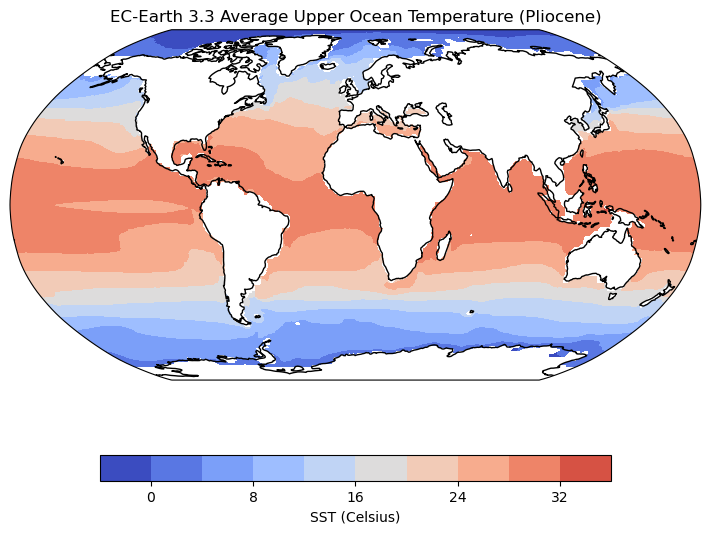

In [8]:
# Specify the file path and name of the dataset
path5 = '/glade/campaign/univ/ugmu0029/PlioMIP2/EC-Earth3.3/'
fname5 = 'EC-Earth3.3_mPlio_T.S.mean.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds5 = xr.open_dataset(path5 + fname5, decode_times=False)

# Rename the lon and lat dimensions
ds5 = ds5.rename({'nav_lon': 'lon', 'nav_lat': 'lat', 'olevel':'lev', 'thetao':'TEMP'})

# Calculate the mean along the 'time_counter' dimension
ds5 = ds5.mean('time_counter')

# Create a new dataset for regridding with desired lat and lon coordinates
ds5_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds5, ds5_out, 'nearest_s2d')

# Perform regridding on the thetao variable and convert to dataset
dr5_out = regridder(ds5['TEMP']).to_dataset(name='TEMP')

# Specify the mask file path and name
mask_file5 = '/glade/campaign/univ/ugmu0029/PlioMIP2/EC-Earth3.3/EC-Earth3.3_mPlio_LSM.nc'

# Open the mask dataset using xarray
ds_mask5 = xr.open_dataset(mask_file5)

# Squeeze the dimensions to remove any size-1 dimensions
ds_mask5 = ds_mask5.squeeze()

# Create a new dataset for regridding the mask with desired lat and lon coordinates
ds5mask_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder for the mask using nearest_s2d method
regridder = xe.Regridder(ds_mask5, ds5mask_out, 'nearest_s2d')

# Perform regridding on the LSM variable and convert to dataset
dr5mask_out = regridder(ds_mask5['LSM']).to_dataset(name='LSM')

# Plotting
plot_projection(
    dr5mask_out.lon,
    dr5mask_out.lat,
    dr5_out['TEMP'][0, :, :].where(dr5mask_out['LSM']==0),
    title="EC-Earth 3.3 Average Upper Ocean Temperature (Pliocene)"
)

## #6 HADGEM3 NEW 1997 Annual Mean Pliocene Sea Surface Temperature

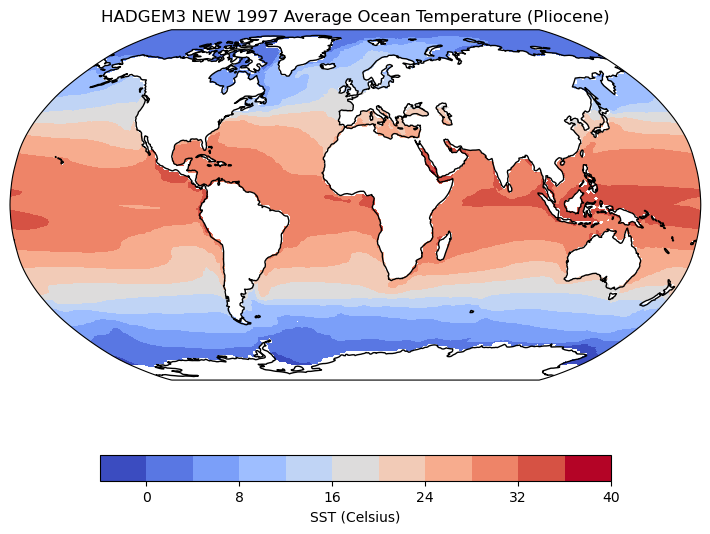

In [9]:
# Specify the file path and name of the dataset
path6 = '/glade/campaign/univ/ugmu0029/PlioMIP2/HadGEM3_new/climatologies/Eoi400/ocean/'
fname6 = 'clims_hadgem3_pliocene_temp_final.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds6 = xr.open_dataset(path6 + fname6, decode_times=False)

# Rename the lon and lat dimensions
ds6 = ds6.rename({'longitude': 'lon', 'latitude': 'lat', 'level':'lev', 'temp':'TEMP'})

# Calculate the mean along the 'time' dimension
ds6 = ds6.mean('time')

# Create a new dataset for regridding with desired lat and lon coordinates
ds6_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds6, ds6_out, 'nearest_s2d')

# Perform regridding on the temp variable and convert to dataset
dr6_out = regridder(ds6['TEMP']).to_dataset(name='TEMP')

# Plotting
plot_projection(
    dr6_out.lon,
    dr6_out.lat,
    dr6_out['TEMP'][0, :, :],
    title="HADGEM3 NEW 1997 Average Ocean Temperature (Pliocene)"
)

## #7 IPSLCM5-LR Annual Mean Pliocene Upper Ocean Temperature (No masking)

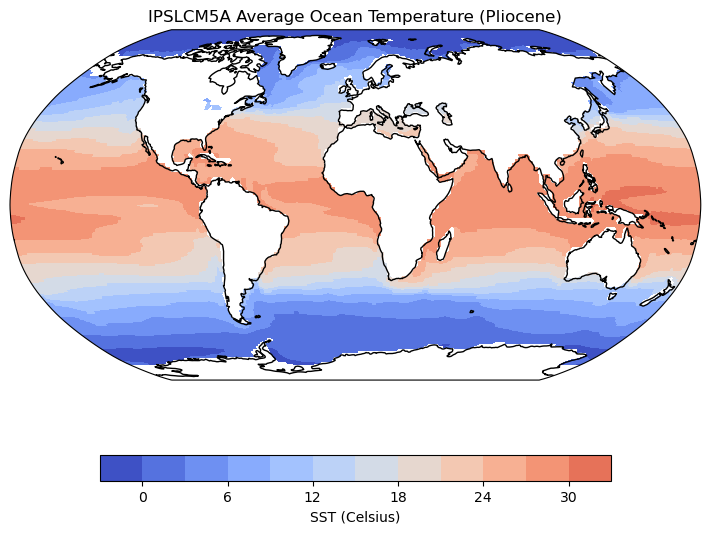

In [10]:
# Specify the file path and name of the dataset
path7 = '/glade/campaign/univ/ugmu0029/PlioMIP2/IPSLCM5A/'
fname7 = 'IPSLCM5A_Eoi400_oceTemp_oceSal_V.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds7 = xr.open_dataset(path7 + fname7, decode_times=False)

# Calculate the mean along the 'time' dimension
ds7 = ds7.mean('time_counter')
ds7 = ds7.mean('tbnds')
ds7 = ds7.rename({'votemper': 'TEMP','x': 'lon','y': 'lat' ,'deptht': 'lev'})

# Create a new dataset for regridding with desired lat and lon coordinates
ds7_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds7, ds7_out, 'nearest_s2d')

# Perform regridding on the temp variable and convert to dataset
dr7_out = regridder(ds7['TEMP']).to_dataset(name='TEMP')

# Plotting
plot_projection(
    dr7_out.lon,
    dr7_out.lat,
    dr7_out['TEMP'][0,:,:],
    title="IPSLCM5A Average Ocean Temperature (Pliocene)"
)

## #8 IPSLCM5-LR 2.1 Annual Mean Pliocene Upper Ocean Temperature (No masking)

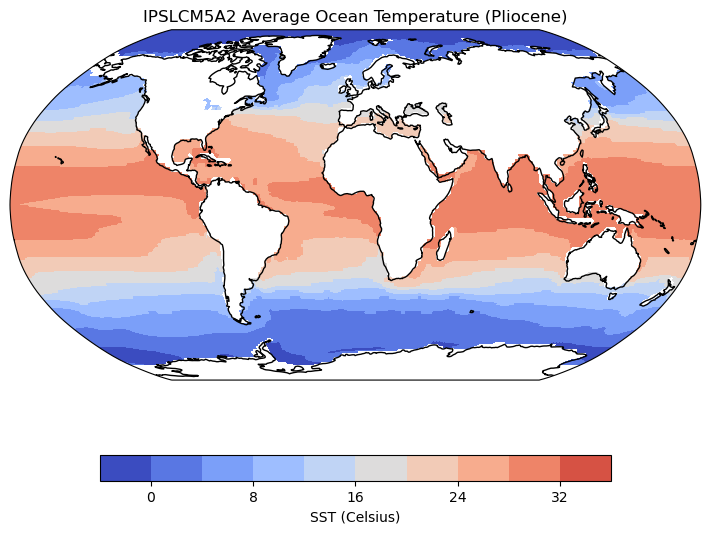

In [11]:
# Specify the file path and name of the dataset
path8 = '/glade/campaign/univ/ugmu0029/PlioMIP2/IPSLCM5A2/'
fname8 = 'IPSLCM5A2_Eoi400_oceTemp_oceSal_V.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds8 = xr.open_dataset(path8 + fname8, decode_times=False)

# Calculate the mean along the 'time' dimension
ds8 = ds8.mean('time_counter')
ds8 = ds8.mean('tbnds')
ds8 = ds8.rename({'thetao': 'TEMP','x': 'lon','y': 'lat','deptht': 'lev'})

# Create a new dataset for regridding with desired lat and lon coordinates
ds8_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds8, ds8_out, 'nearest_s2d')

# Perform regridding on the temp variable and convert to dataset
dr8_out = regridder(ds8['TEMP']).to_dataset(name='TEMP')

# Plotting
plot_projection(
    dr8_out.lon,
    dr8_out.lat,
    dr8_out['TEMP'][0,:,:],
    title="IPSLCM5A2 Average Ocean Temperature (Pliocene)"
)

## #9 MIROC4 2004 EOI400 Annual Mean Pliocene Upper Ocean Temperature (High Memory Usage 16GB REQ)

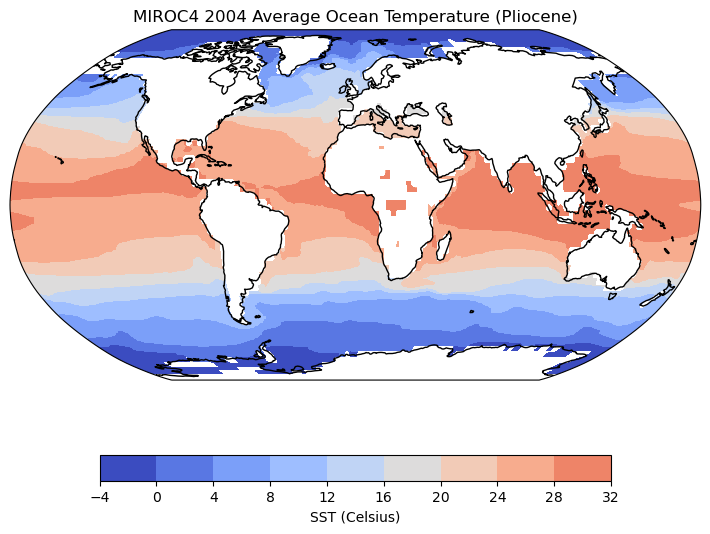

In [12]:
# Specify the file path and name of the dataset
path9 = '/glade/campaign/univ/ugmu0029/PlioMIP2/MIROC4m/to/'
fname9 = 'MIROC4m_Eoi400_Omon_to.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds9 = xr.open_dataset(path9 + fname9, decode_times=False)

# Calculate the mean along the 'time' dimension
ds9 = ds9.mean('time')
ds9 = ds9.rename({'to': 'TEMP', 'depth':'lev'})

# Create a new dataset for regridding with desired lat and lon coordinates
ds9_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds9, ds9_out, 'nearest_s2d')

# Perform regridding on the temp variable and convert to dataset
dr9_out = regridder(ds9['TEMP']).to_dataset(name='TEMP')

# Specify the mask file path and name
mask_file9 = '/glade/campaign/univ/ugmu0029/PlioMIP2/MIROC4m/sftlf_ts/MIROC4m_Eoixxx_fx_sftlf_ts.nc'

# Open the mask dataset using xarray
ds_mask9 = xr.open_dataset(mask_file9, decode_times=False)

# Squeeze the dimensions to remove any size-1 dimensions
ds_mask9 = ds_mask9.squeeze()

# Create a new dataset for regridding the mask with desired lat and lon coordinates
ds9mask_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder for the mask using nearest_s2d method
regridder = xe.Regridder(ds_mask9, ds9mask_out, 'nearest_s2d')

# Perform regridding on the LSM variable and convert to dataset
dr9mask_out = regridder(ds_mask9['sftlf']).to_dataset(name='sftlf')

# Plotting
plot_projection(
    dr9mask_out.lon,
    dr9mask_out.lat,
    dr9_out['TEMP'][0, :, :].where(dr9mask_out['sftlf']==0),
    title="MIROC4 2004 Average Ocean Temperature (Pliocene)"
)

## #10 Utrecht Annual Mean Pliocene Upper Ocean Temperature 

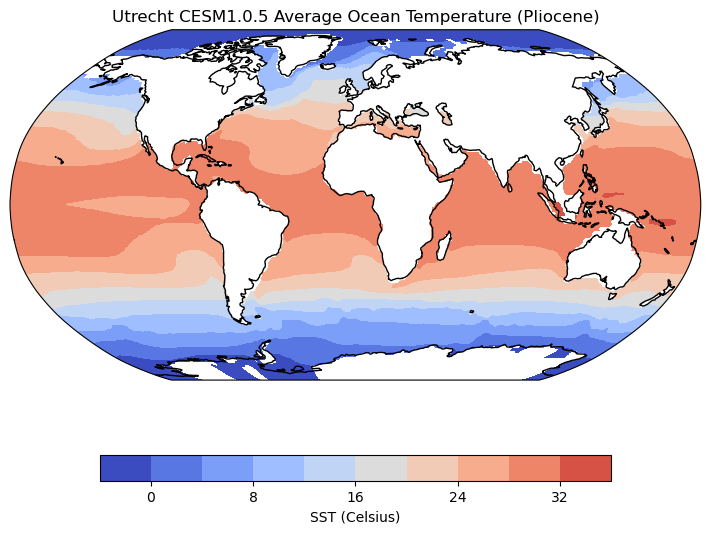

In [13]:
# Specify the file path and name of the dataset
path10 = '/glade/campaign/univ/ugmu0029/PlioMIP2/Utrecht/CESM1.0.5/Eoi400/'
fname10 = 'thetao_Omon_CESM1.0.5_Eoi400_r1i1p1f1_gn_190001-200012.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds10 = xr.open_dataset(path10 + fname10, decode_times=False)

# Rename the 'y' and 'x' dimensions to 'lat' and 'lon', and 'thetao' to 'temp'
ds10 = ds10.rename({'y': 'lat', 'x': 'lon', 'thetao': 'TEMP', 'z_t':'lev'})

# Squeeze the dimensions to remove any size-1 dimensions
ds10 = ds10.squeeze()

# Take the mean along the 'time' dimension
ds10 = ds10.mean('time')

ds10['lev'] = ds10['lev'] * (1/100)

# Create a new dataset for regridding with desired lat and lon coordinates
ds10_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds10, ds10_out, 'nearest_s2d')

# Perform regridding on the temp variable and convert to dataset
dr10_out = regridder(ds10['TEMP']).to_dataset(name='TEMP')

# Specify the mask file path and name
mask_file10 = '/glade/campaign/univ/ugmu0029/PlioMIP2/Utrecht/CESM1.0.5/Eoi400/land_sea_mask_Omon_CESM1.0.5_b.PLIO_5Ma_Eoi400_f19g16_NESSC_control_r1i1p1f1_gn.nc'

# Open the mask dataset using xarray, with decode_times=False to avoid decoding times
ds_mask10 = xr.open_dataset(mask_file10, decode_times=False)

# Rename the dimensions and variables in the mask dataset
ds_mask10 = ds_mask10.rename({'NLON': 'lon', 'NLAT': 'lat', 'LAND_SEA_MASK_OMON': 'lsm'})

# Create a new dataset for regridding the mask with desired lat and lon coordinates
ds10mask_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder for the mask using nearest_s2d method
regridder = xe.Regridder(ds_mask10, ds10mask_out, 'nearest_s2d')

# Perform regridding on the lsm variable and convert to dataset
dr10mask_out = regridder(ds_mask10['lsm']).to_dataset(name='lsm')

# Plotting
plot_projection(
    dr10mask_out.lon,
    dr10mask_out.lat,
    dr10_out['TEMP'][0, :, :],
    title="Utrecht CESM1.0.5 Average Ocean Temperature (Pliocene)"
)


## #11 IPSLCM6A_LR Annual Mean Pliocene Upper Ocean Temperature (64 GB Rec)

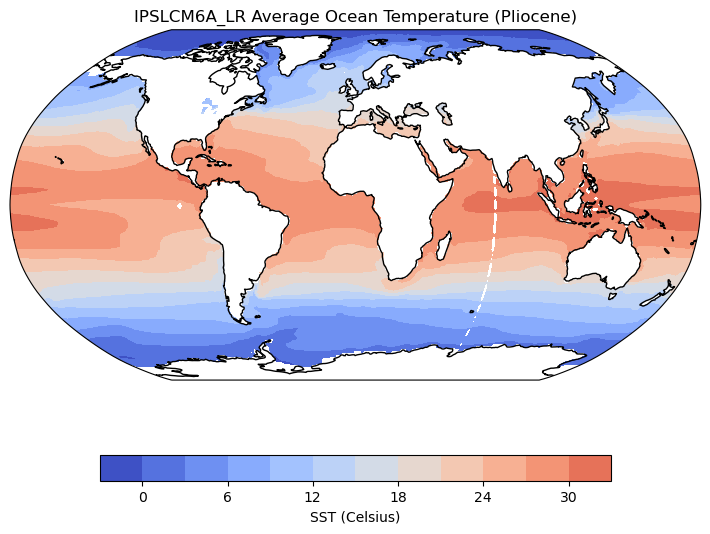

In [14]:
# Specify the file path and name of the dataset
path11 = '/glade/campaign/univ/ugmu0029/PlioMIP2/IPSLCM6A/thetao/'
fname11 = 'thetao_Omon_IPSL-CM6A-LR_midPliocene-eoi400_r1i1p1f1_gn_195001-204912.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds11 = xr.open_dataset(path11 + fname11)

# Squeeze the dimensions to remove any size-1 dimensions
ds11 = ds11.squeeze()

# Calculate the mean along the 'time' dimension
ds11 = ds11.mean('time')

# Rename the 'thetao' variable to 'temp'
ds11 = ds11.rename({'thetao': 'TEMP', 'y': 'lat', 'x': 'lon', 'olevel':'lev'})

# Create a new dataset for regridding with desired lat and lon coordinates
ds11_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds11, ds11_out, 'nearest_s2d')

# Perform regridding on the temp variable and convert to dataset
dr11_out = regridder(ds11['TEMP']).to_dataset(name='TEMP')

# Plotting
plot_projection(
    dr11_out.lon,
    dr11_out.lat,
    dr11_out['TEMP'][0, :, :],
    title="IPSLCM6A_LR Average Ocean Temperature (Pliocene)"
)

## #12 GISS Annual Mean Pliocene Upper Ocean Temperature (No Custom Mask)

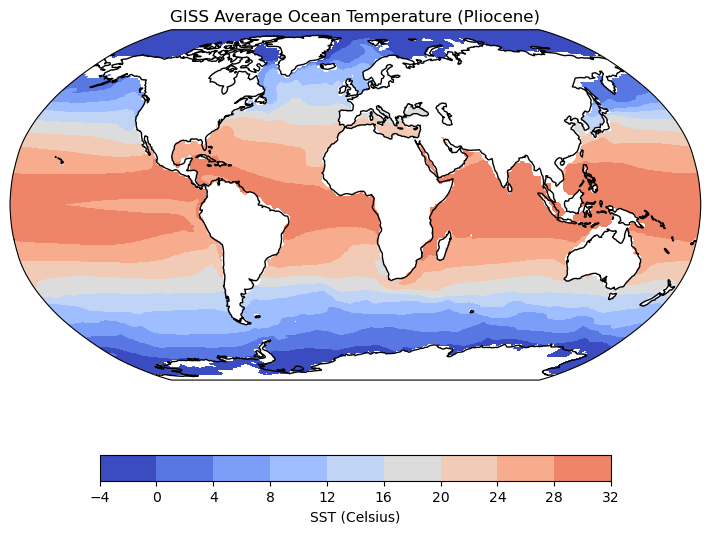

In [15]:
# Specify the file path and name of the dataset
path12 = '/glade/campaign/univ/ugmu0029/PlioMIP2/GISS/thetao/thetaoPlio/'
fname12 = 'thetao_Omon_GISS-E2-1-G_midPliocene-eoi400_r1i1p1f1_gn_305101-307012.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds12 = xr.open_dataset(path12 + fname12)

# Calculate the mean along the 'time' dimension
ds12 = ds12.mean('time')

# Rename the 'thetao' variable to 'temp'
ds12 = ds12.rename({'thetao': 'TEMP'})

# Squeeze the dimensions to remove any size-1 dimensions
ds12 = ds12.squeeze()

# Create a new dataset for regridding with desired lat and lon coordinates
ds12_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds12, ds12_out, 'nearest_s2d')

# Perform regridding on the temp variable and convert to dataset
dr12_out = regridder(ds12['TEMP']).to_dataset(name='TEMP')

# Plotting
plot_projection(
    dr12_out.lon,
    dr12_out.lat,
    dr12_out['TEMP'][0, :, :],
    title="GISS Average Ocean Temperature (Pliocene)"
)

## #13 NorESM-F Annual Mean Pliocene Upper Ocean Temperature 

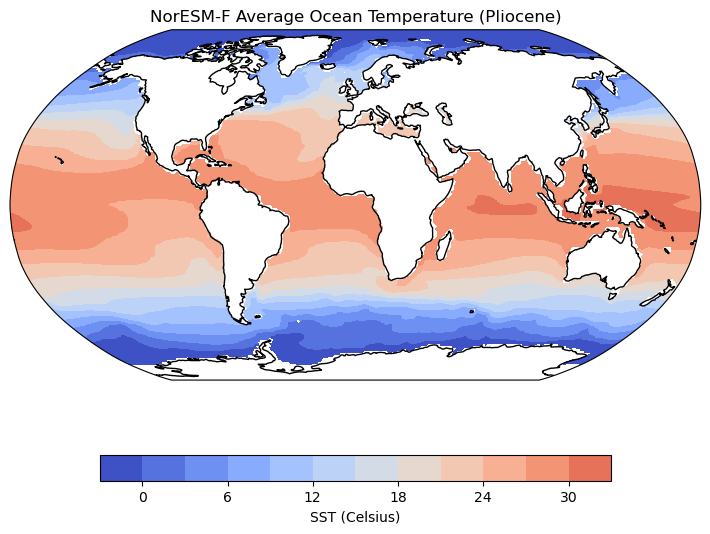

In [16]:
# Specify the file path and name of the dataset
path13 = '/glade/campaign/univ/ugmu0029/PlioMIP2/NorESM1-F/'
fname13 = 'Eoi400_NorESM1-F_thetao.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds13 = xr.open_dataset(path13 + fname13, decode_times=False)

# Rename the 'thetao' variable to 'TEMP' and 'depth' to 'lev'
ds13 = ds13.rename({'thetao': 'TEMP', 'depth':'lev'})

# Squeeze the dimensions to remove any size-1 dimensions
ds13 = ds13.squeeze()

# Create a new dataset for regridding with desired lat and lon coordinates
ds13_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds13, ds13_out, 'nearest_s2d')

# Perform regridding on the temp variable and convert to dataset
dr13_out = regridder(ds13['TEMP']).to_dataset(name='TEMP')

# Plotting
plot_projection(
    dr13_out.lon,
    dr13_out.lat,
    dr13_out['TEMP'][0, :, :],
    title="NorESM-F Average Ocean Temperature (Pliocene)"
)

# Model CONTROL CASES VARIABLE LIST

| Model CONTROL CASE | Variable Name |
| --- | --- |
| CCSM4 (b40) | ds14 |
| CESM 1.2 (b.e12) | ds15 |
| CESM2(b.e21) | ds16 |
| COSMOS | ds17 |
| EC-Earth 3.3 | ds18 |
| HADGEM3 NEW 1997 | ds19  |
| IPSLCM5-LR  | ds20 |
| IPSLCM5-LR 2.1(A2) | ds21 |
| MIROC4 2004 | ds22 |
| Utrecht CESM1.0.5  | ds23 |
| IPSLCM6A_LR | ds24 |
| GISS | ds25 |
| NorESM-F  | ds26 |

## #14 CCSM4 Annual Mean Preindustrial Control Upper Ocean Temperature (No Custom Mask)

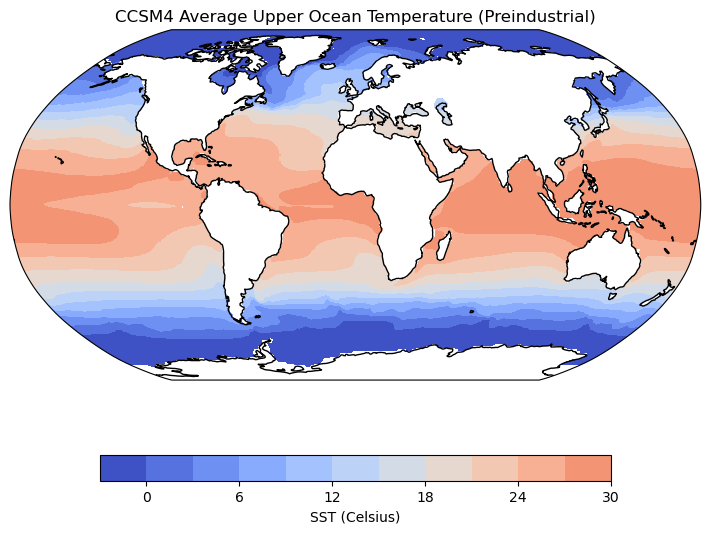

In [17]:
# Specify the file path and name of the dataset
path14 = '/glade/campaign/univ/ugmu0029/PlioMIP2/NCAR/'
fname14 = 'b40.B1850.f09_g16.preind.pop.h.TEMP.0081-0180.annavg.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds14 = xr.open_dataset(path14 + fname14, decode_times=False)

# Squeeze the dataset to remove singleton dimensions
ds14 = ds14.squeeze()

# Convert z_t variable to meters (divide by 100)
ds14['z_t'] = ds14['z_t'] * (1/100)

# Rename variables TLONG and TLAT to lon and lat, respectively
ds14 = ds14.rename({'TLONG': 'lon', 'TLAT': 'lat', 'z_t' :'lev'})

# Create a new dataset with desired lat and lon coordinates
ds14_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder object using the source dataset (ds14) and the destination dataset (ds14_out)
regridder = xe.Regridder(ds14, ds14_out, 'nearest_s2d')

# Regrid the 'TEMP' variable using the regridder and convert it to a dataset
dr14_out = regridder(ds14['TEMP']).to_dataset(name='TEMP')

# Plot the data
plot_projection(
    dr14_out.lon,
    dr14_out.lat,
    dr14_out['TEMP'][0, :, :],
    title="CCSM4 Average Upper Ocean Temperature (Preindustrial)"
)

## #15 CESM 1.2 Annual Mean Preindustrial Control Upper Ocean Temperature (No Custom Mask)

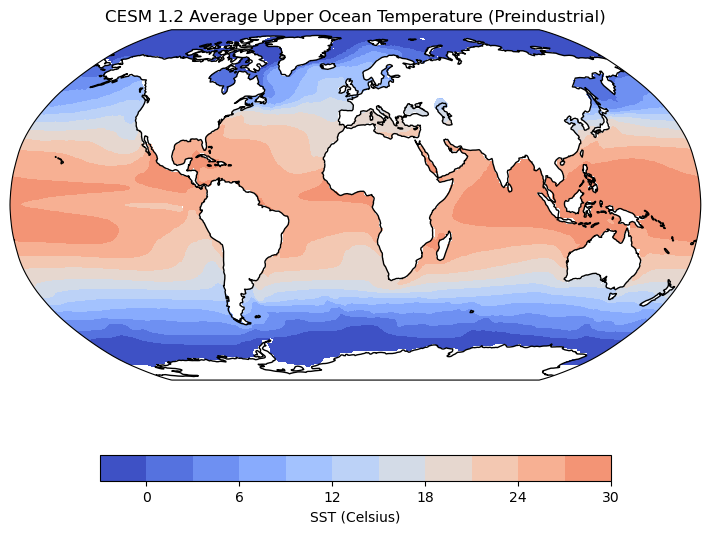

In [18]:
# Specify the file path and name of the dataset
path15 = '/glade/campaign/univ/ugmu0029/PlioMIP2/NCAR/'
fname15 = 'b.e12.B1850.f09_g16.preind.pop.h.TEMP.0707-0806.annavg.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds15 = xr.open_dataset(path15 + fname15, decode_times=False)

# Squeeze the dataset to remove singleton dimensions
ds15 = ds15.squeeze()

# Convert z_t variable to meters (divide by 100)
ds15['z_t'] = ds15['z_t'] * (1/100)

# Rename variables TLONG and TLAT to lon and lat, respectively
ds15 = ds15.rename({'TLONG': 'lon', 'TLAT': 'lat', 'z_t' :'lev'})

# Create a new dataset with desired lat and lon coordinates
ds15_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder object using the source dataset (ds15) and the destination dataset (ds15_out)
regridder = xe.Regridder(ds15, ds15_out, 'nearest_s2d')

# Regrid the 'TEMP' variable using the regridder and convert it to a dataset
dr15_out = regridder(ds15['TEMP']).to_dataset(name='TEMP')

# Plotting
plot_projection(
    dr15_out.lon,
    dr15_out.lat,
    dr15_out['TEMP'][0, :, :],
    title="CESM 1.2 Average Upper Ocean Temperature (Preindustrial)"
)

## #16 CESM2 Annual Mean Preindustrial Control Upper Ocean Temperature (No Custom Mask)

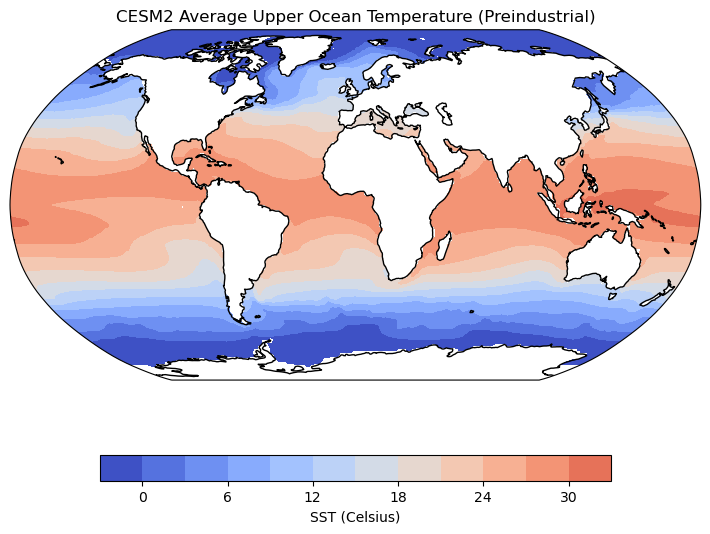

In [19]:
# Specify the file path and name of the dataset
path16 = '/glade/campaign/univ/ugmu0029/PlioMIP2/NCAR/'
fname16 = 'b.e21.B1850.f09_g16.preind.pop.h.TEMP.1100-1200.annavg.nc'

# Open the dataset using xarray and squeeze the dimensions
ds16 = xr.open_dataset(path16 + fname16)
ds16 = ds16.squeeze()

# Convert z_t variable to meters (divide by 100)
ds16['z_t'] = ds16['z_t'] * (1/100)

# Rename the dimensions from TLONG and TLAT to lon and lat
ds16 = ds16.rename({'TLONG': 'lon', 'TLAT': 'lat', 'z_t' : 'lev'})

# Create a new dataset for regridding with desired lat and lon coordinates
ds16_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds16, ds16_out, 'nearest_s2d')

# Perform regridding on the TEMP variable and convert to dataset
dr16_out = regridder(ds16['TEMP']).to_dataset(name='TEMP')

# Plotting
plot_projection(
    dr16_out['lon'],
    dr16_out['lat'],
    dr16_out['TEMP'][0, :, :],
    title="CESM2 Average Upper Ocean Temperature (Preindustrial)"
)

## #17 COSMOS Annual Mean Preindustrial Control Upper Ocean Temperature

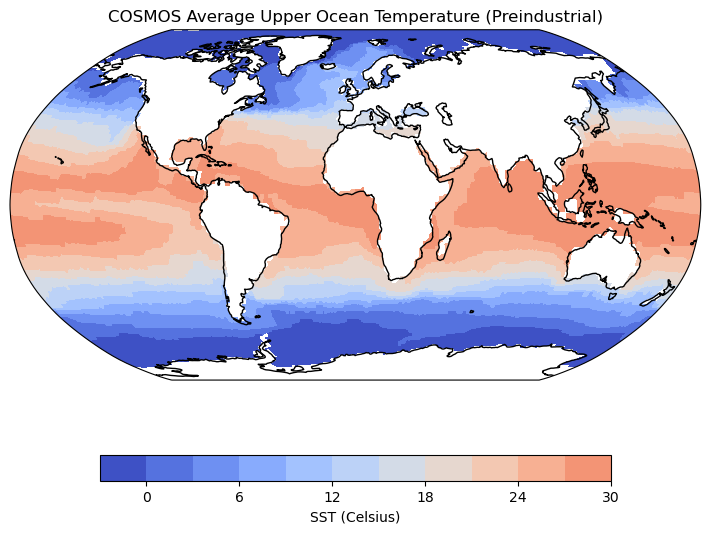

In [20]:
# Specify the file path and name of the dataset
path17 = '/glade/campaign/univ/ugmu0029/PlioMIP2/AWI/COSMOS/E280/'
fname17 = 'E280.THO_CMIP6_name_thetao_2650-2749_multiyear_monthly_mean_remapcon_r360x180.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds17 = xr.open_dataset(path17 + fname17, decode_times=False)

# Calculate the mean along the 'time' dimension
ds17 = ds17.mean('time')

# Rename the lon and lat dimensions
ds17 = ds17.rename({'plev':'lev', 'thetao':'TEMP'})

# Create a new dataset for regridding with desired lat and lon coordinates
ds17_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds17, ds17_out, 'nearest_s2d')

# Perform regridding on the thetao variable and convert to dataset
dr17_out = regridder(ds17['TEMP']).to_dataset(name='TEMP')

# Convert the temperature values from Kelvin to Celsius
dr17_out['TEMP'].values = dr17_out['TEMP'].values - 273.15

# Specify the mask file path and name
mask_file17 = '/glade/campaign/univ/ugmu0029/PlioMIP2/AWI/COSMOS/land_sea_masks/E280_et_al/E280.slm.oce.nc'

# Open the mask dataset using xarray
ds_mask17 = xr.open_dataset(mask_file17)

# Squeeze the dimensions to remove any size-1 dimensions
ds_mask17 = ds_mask17.squeeze()

# Create a new dataset for regridding the mask with desired lat and lon coordinates
ds17mask_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder for the mask using nearest_s2d method
regridder = xe.Regridder(ds_mask17, ds17mask_out, 'nearest_s2d')

# Perform regridding on the SLM variable and convert to dataset
dr17mask_out = regridder(ds_mask17['SLM']).to_dataset(name='SLM')

# Plotting
plot_projection(
    dr17mask_out.lon,
    dr17mask_out.lat,
    dr17_out['TEMP'][0, :, :].where(dr17mask_out['SLM']==0),
    title="COSMOS Average Upper Ocean Temperature (Preindustrial)"
)

## #18 Earth 3.3 Annual Mean Preindustrial Control Upper Ocean Temperature

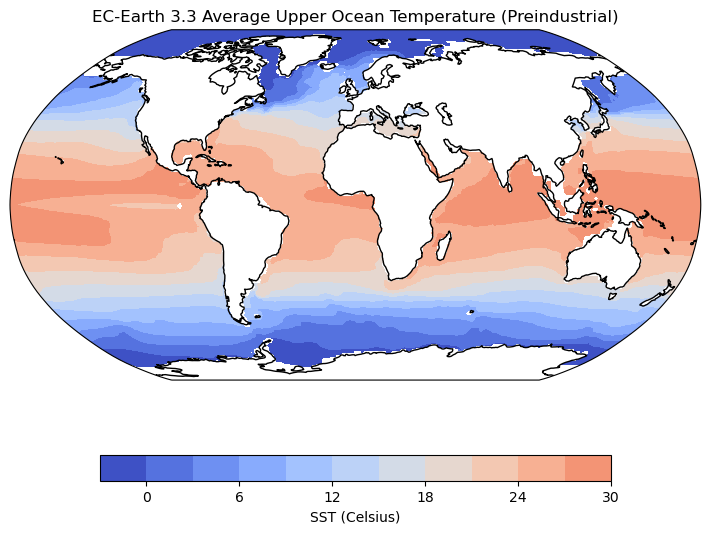

In [21]:
# Specify the file path and name of the dataset
path18 = '/glade/campaign/univ/ugmu0029/PlioMIP2/EC-Earth3.3/'
fname18 = 'EC-Earth3.3_PI_T.S.mean.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds18 = xr.open_dataset(path18 + fname18, decode_times=False)

# Rename the lon and lat dimensions
ds18 = ds18.rename({'nav_lon': 'lon', 'nav_lat': 'lat', 'olevel':'lev', 'thetao':'TEMP'})

# Calculate the mean along the 'time_counter' dimension
ds18 = ds18.mean('time_counter')

# Create a new dataset for regridding with desired lat and lon coordinates
ds18_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})
# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds18, ds18_out, 'nearest_s2d')

# Perform regridding on the thetao variable and convert to dataset
dr18_out = regridder(ds18['TEMP']).to_dataset(name='TEMP')

# Specify the mask file path and name
mask_file18 = '/glade/campaign/univ/ugmu0029/PlioMIP2/EC-Earth3.3/EC-Earth3.3_mPlio_LSM.nc'

# Open the mask dataset using xarray
ds_mask18 = xr.open_dataset(mask_file18)

# Squeeze the dimensions to remove any size-1 dimensions
ds_mask18 = ds_mask18.squeeze()

# Create a new dataset for regridding the mask with desired lat and lon coordinates
ds18mask_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder for the mask using nearest_s2d method
regridder = xe.Regridder(ds_mask18, ds18mask_out, 'nearest_s2d')

# Perform regridding on the LSM variable and convert to dataset
dr18mask_out = regridder(ds_mask18['LSM']).to_dataset(name='LSM')

# Plotting
plot_projection(
    dr18_out.lon,
    dr18_out.lat,
    dr18_out['TEMP'][0, :, :].where(dr18mask_out['LSM'] == 0),
    title="EC-Earth 3.3 Average Upper Ocean Temperature (Preindustrial)"
)

## #19 HADGEM3 NEW 1997 Annual Mean Preindustrial Control Upper Ocean Temperature

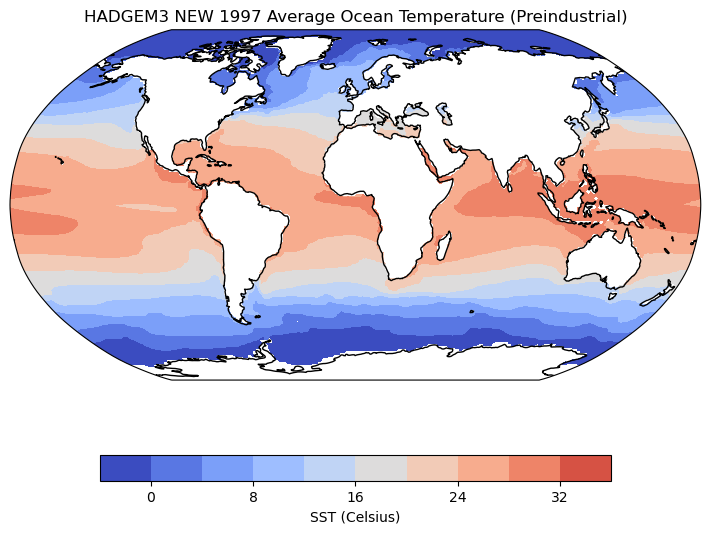

In [22]:
# Specify the file path and name of the dataset
path19 = '/glade/campaign/univ/ugmu0029/PlioMIP2/HadGEM3_new/climatologies/E280/ocean/'
fname19 = 'clims_hadgem3_pi_temp.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds19 = xr.open_dataset(path19 + fname19, decode_times=False)

# Rename the lon and lat dimensions
ds19 = ds19.rename({'longitude': 'lon', 'latitude': 'lat', 'level':'lev', 'temp':'TEMP'})

# Calculate the mean along the 'time' dimension
ds19 = ds19.mean('time')

# Create a new dataset for regridding with desired lat and lon coordinates
ds19_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})
# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds19, ds19_out, 'nearest_s2d')

# Perform regridding on the temp variable and convert to dataset
dr19_out = regridder(ds19['TEMP']).to_dataset(name='TEMP')

# Plotting
plot_projection(
    dr19_out.lon,
    dr19_out.lat,
    dr19_out['TEMP'][0, :, :],
    title="HADGEM3 NEW 1997 Average Ocean Temperature (Preindustrial)"
)

## #20 IPSLCM5-LR Annual Mean Preindustrial Control Upper Ocean Temperature (No masking)

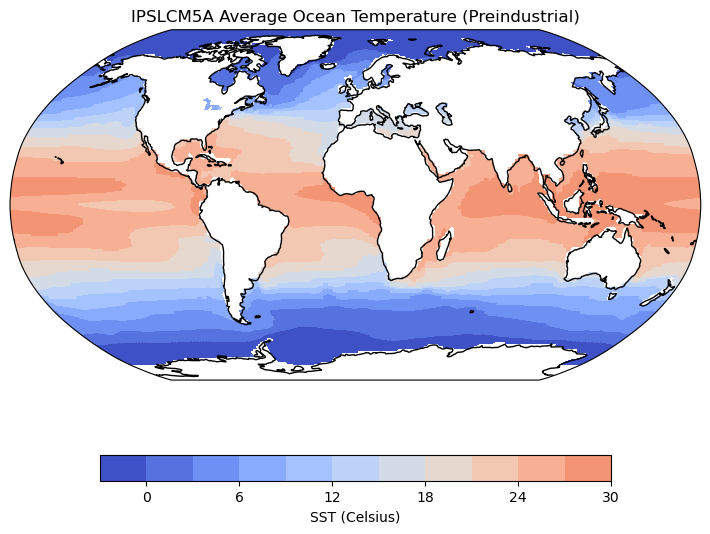

In [23]:
# Specify the file path and name of the dataset
path20 = '/glade/campaign/univ/ugmu0029/PlioMIP2/IPSLCM5A/'
fname20 = 'IPSLCM5A_piControl_oceTemp_oceSal_V.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds20 = xr.open_dataset(path20 + fname20, decode_times=False)

# Calculate the mean along the 'time' dimension
ds20 = ds20.mean('time_counter')

# Rename variables for clarity
ds20 = ds20.rename({'votemper': 'TEMP','x': 'lon','y': 'lat', 'deptht':'lev'})

# Create a new dataset for regridding with desired lat and lon coordinates
ds20_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds20, ds20_out, 'nearest_s2d')

# Perform regridding on the TEMP variable and convert to dataset
dr20_out = regridder(ds20['TEMP']).to_dataset(name='TEMP')

# Plotting
plot_projection(
    dr20_out.lon,
    dr20_out.lat,
    dr20_out['TEMP'][0, :, :],
    title="IPSLCM5A Average Ocean Temperature (Preindustrial)"
)

## #21 IPSLCM5A2 Annual Mean Preindustrial Control Upper Ocean Temperature (No masking)

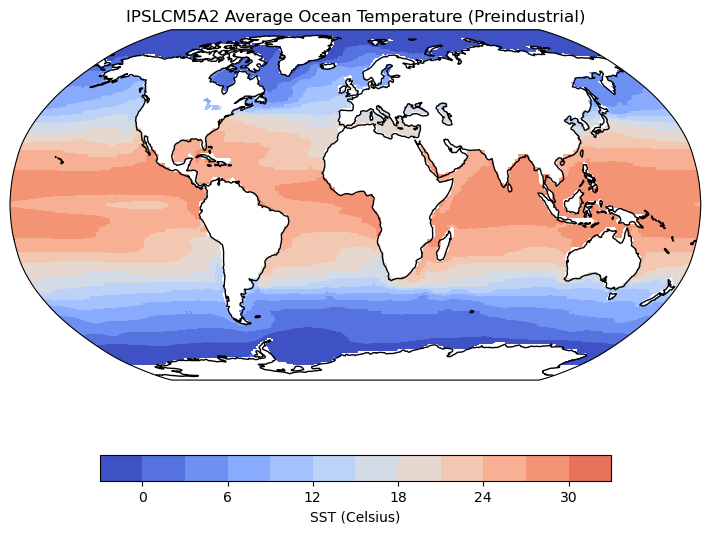

In [24]:
# Specify the file path and name of the dataset
path21 = '/glade/campaign/univ/ugmu0029/PlioMIP2/IPSLCM5A2/'
fname21 = 'IPSLCM5A2_piControl_oceTemp_oceSal_V.nc'

# Open the dataset using xarray
ds21 = xr.open_dataset(path21 + fname21)

# Calculate the mean along the 'time' dimension and handle multi-dimensional coordinate
ds21 = ds21.mean('time_counter')
ds21 = ds21.mean('nvertex')

# Rename variables for clarity
ds21 = ds21.rename({'thetao': 'TEMP','x': 'lon','y': 'lat','deptht':'lev'})

# Create a new dataset for regridding with desired lat and lon coordinates
ds21_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds21, ds21_out, 'nearest_s2d')

# Perform regridding on the TEMP variable and convert to dataset
dr21_out = regridder(ds21['TEMP']).to_dataset(name='TEMP')

# Plotting
plot_projection(
    dr21_out.lon,
    dr21_out.lat,
    dr21_out['TEMP'][0, :, :],
    title="IPSLCM5A2 Average Ocean Temperature (Preindustrial)"
)

## #22 MIROC 2004 Annual Mean Preindustrial Control Upper Ocean Temperature (High Memory Usage 16GB REC)

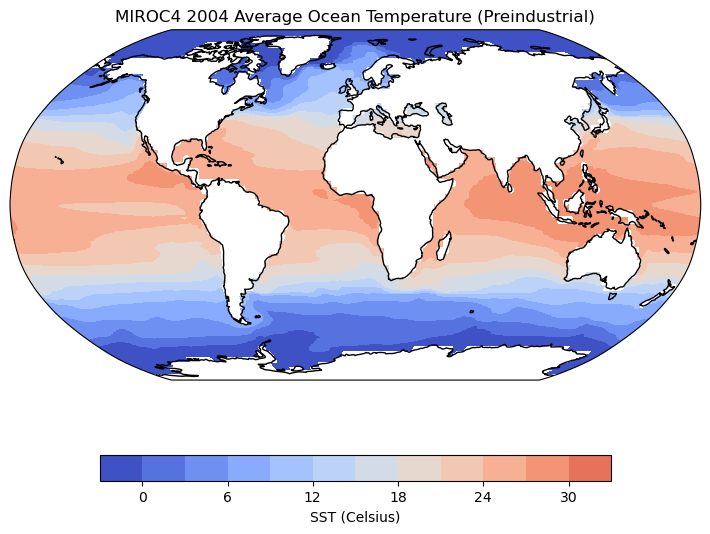

In [25]:
# Specify the file path and name of the dataset
path22 = '/glade/campaign/univ/ugmu0029/PlioMIP2/MIROC4m/to/'
fname22 = 'MIROC4m_E280_Omon_to.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds22 = xr.open_dataset(path22 + fname22, decode_times=False)

# Calculate the mean along the 'time' dimension
ds22 = ds22.mean('time')
ds22 = ds22.rename({'to': 'TEMP', 'depth':'lev'})

# Create a new dataset for regridding with desired lat and lon coordinates
ds22_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds22, ds22_out, 'nearest_s2d')

# Perform regridding on the temp variable and convert to dataset
dr22_out = regridder(ds22['TEMP']).to_dataset(name='TEMP')

# Specify the mask file path and name
mask_file22 = '/glade/campaign/univ/ugmu0029/PlioMIP2/MIROC4m/sftlf_ts/MIROC4m_Exxx_fx_sftlf_ts.nc'

# Open the mask dataset using xarray
ds_mask22 = xr.open_dataset(mask_file22)

# Squeeze the dimensions to remove any size-1 dimensions
ds_mask22 = ds_mask22.squeeze()

# Create a new dataset for regridding the mask with desired lat and lon coordinates
ds22mask_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder for the mask using nearest_s2d method
regridder = xe.Regridder(ds_mask22, ds22mask_out, 'nearest_s2d')

# Perform regridding on the sftlf variable and convert to dataset
dr22mask_out = regridder(ds_mask22['sftlf']).to_dataset(name='sftlf')

# Plotting
plot_projection(
    dr22_out.lon,
    dr22_out.lat,
    dr22_out['TEMP'][0, :, :].where(dr22mask_out['sftlf'] == 0),
    title="MIROC4 2004 Average Ocean Temperature (Preindustrial)"
)

## #23 Utrecht CESM 1.0.5 Annual Mean Preindustrial Control Upper Ocean Temperature (High Memory Usage 32 GB REC + Long RT)

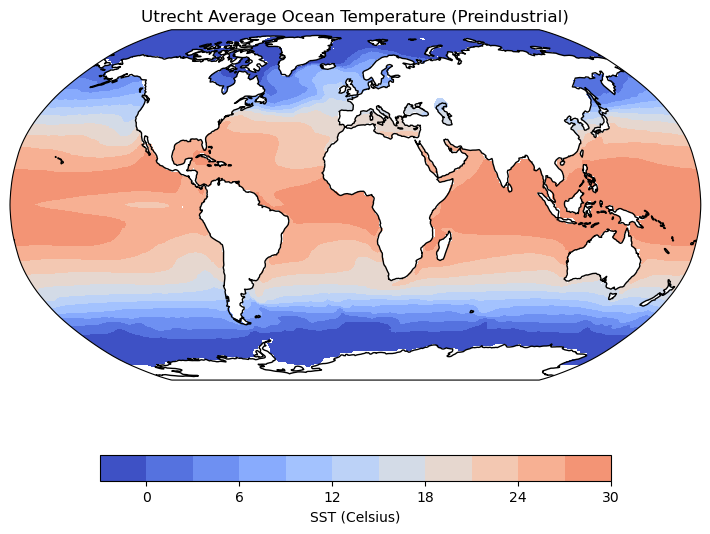

In [26]:
# Specify the file path and name of the dataset
path23 = '/glade/campaign/univ/ugmu0029/PlioMIP2/Utrecht/CESM1.0.5/E280/'
fname23 = 'thetao_Omon_CESM1.0.5_E280_r1i1p1f1_gn_275001-285012.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds23 = xr.open_dataset(path23 + fname23, decode_times=False)

# Rename the 'y' and 'x' dimensions to 'lat' and 'lon', and 'thetao' to 'TEMP'
ds23 = ds23.rename({'y': 'lat', 'x': 'lon', 'thetao': 'TEMP', 'z_t':'lev'})

# Squeeze the dimensions to remove any size-1 dimensions
ds23 = ds23.squeeze()

# Take the mean along the 'time' dimension
ds23 = ds23.mean('time')

ds23['lev'] = ds23['lev'] * (1/100)

# Create a new dataset for regridding with desired lat and lon coordinates
ds23_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds23, ds23_out, 'nearest_s2d')

# Perform regridding on the TEMP variable and convert to dataset
dr23_out = regridder(ds23['TEMP']).to_dataset(name='TEMP')

# Specify the mask file path and name
mask_file23 = '/glade/campaign/univ/ugmu0029/PlioMIP2/Utrecht/CESM1.0.5/E280/land_sea_mask_Omon_CESM1.0.5_b.PI_1pic_f19g16_NESSC_control_r1i1p1f1_gn.nc'

# Open the mask dataset using xarray, with decode_times=False to avoid decoding times
ds_mask23 = xr.open_dataset(mask_file23, decode_times=False)

# Rename the dimensions and variables in the mask dataset
ds_mask23 = ds_mask23.rename({'NLON': 'lon', 'NLAT': 'lat', 'LAND_SEA_MASK_OMON': 'LSM'})

# Create a new dataset for regridding the mask with desired lat and lon coordinates
ds23mask_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder for the mask using nearest_s2d method
regridder = xe.Regridder(ds_mask23, ds23mask_out, 'nearest_s2d')

# Perform regridding on the LSM variable and convert to dataset
dr23mask_out = regridder(ds_mask23['LSM']).to_dataset(name='LSM')

# Plotting
plot_projection(
    dr23mask_out.lon,
    dr23mask_out.lat,
    dr23_out['TEMP'][0, :, :],
    title="Utrecht Average Ocean Temperature (Preindustrial)"
)

## #24 IPSLCM6A_LR Annual Mean Preindustrial Control Upper Ocean Temperature (64GB Rec)

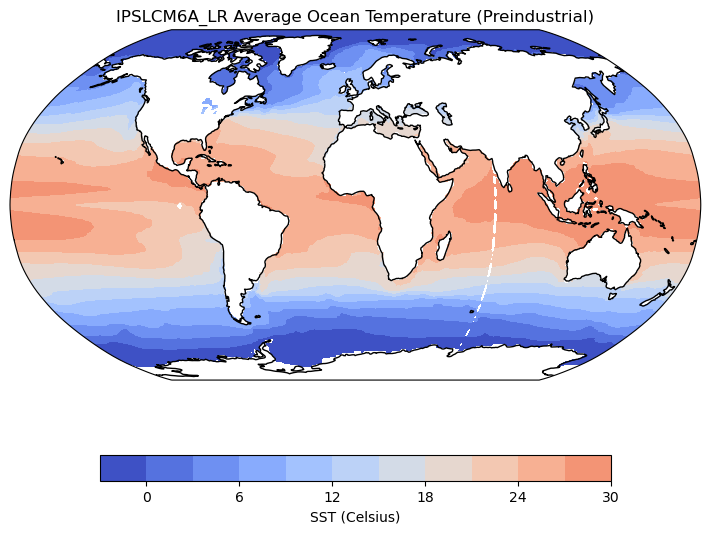

In [27]:
# Specify the file path and name of the dataset
path24 = '/glade/campaign/univ/ugmu0029/PlioMIP2/IPSLCM6A/thetao/'
fname24 = 'thetao_Omon_IPSL-CM6A-LR_piControl_r1i2p1f1_gn_195001-204912.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds24 = xr.open_dataset(path24 + fname24)

# Squeeze the dimensions to remove any size-1 dimensions
ds24 = ds24.squeeze()

# Calculate the mean along the 'time' dimension
ds24 = ds24.mean('time')

# Rename the 'thetao' variable to 'TEMP'
ds24 = ds24.rename({'thetao': 'TEMP', 'y': 'lat', 'x': 'lon', 'olevel' : 'lev'})

# Create a new dataset for regridding with desired lat and lon coordinates
ds24_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds24, ds24_out, 'nearest_s2d')

# Perform regridding on the TEMP variable and convert to dataset
dr24_out = regridder(ds24['TEMP']).to_dataset(name='TEMP')

# Plotting
plot_projection(
    dr24_out.lon,
    dr24_out.lat,
    dr24_out['TEMP'][0, :, :],
    title="IPSLCM6A_LR Average Ocean Temperature (Preindustrial)"
)

## #25 GISS Annual Mean Preindustrial Control Upper Ocean Temperature (No Custom Masking)

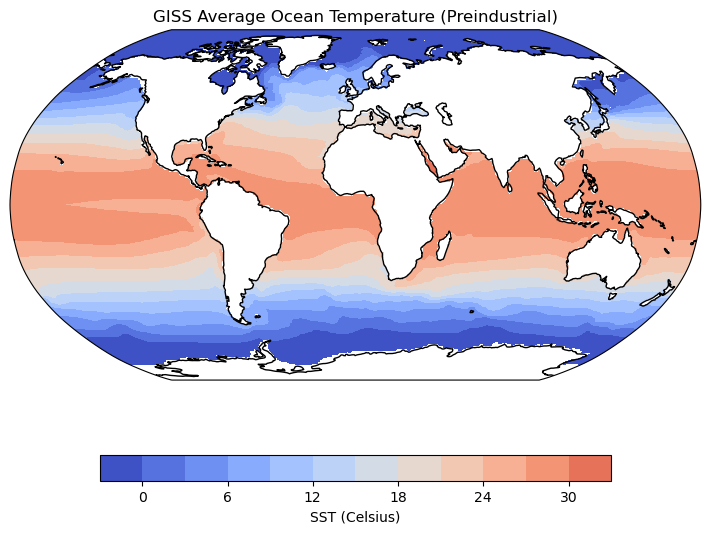

In [28]:
# Specify the file path and name of the dataset
path25 = '/glade/campaign/univ/ugmu0029/PlioMIP2/GISS/thetao/thetaoControl/'
fname25 = 'thetao_Omon_GISS-E2-1-G_piControl_r1i1p1f3_gn_290001-291912.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds25 = xr.open_dataset(path25 + fname25)

# Calculate the mean along the 'time' dimension
ds25 = ds25.mean('time')

# Rename the 'thetao' variable to 'TEMP'
ds25 = ds25.rename({'thetao': 'TEMP'})

# Squeeze the dimensions to remove any size-1 dimensions
ds25 = ds25.squeeze()

# Create a new dataset for regridding with desired lat and lon coordinates
ds25_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds25, ds25_out, 'nearest_s2d')

# Perform regridding on the TEMP variable and convert to dataset
dr25_out = regridder(ds25['TEMP']).to_dataset(name='TEMP')

# Plotting
plot_projection(
    dr25_out.lon,
    dr25_out.lat,
    dr25_out['TEMP'][0, :, :],
    title="GISS Average Ocean Temperature (Preindustrial)"
)

## #26 NorESM-F Annual Mean Preindustrial Upper Ocean Temperature 

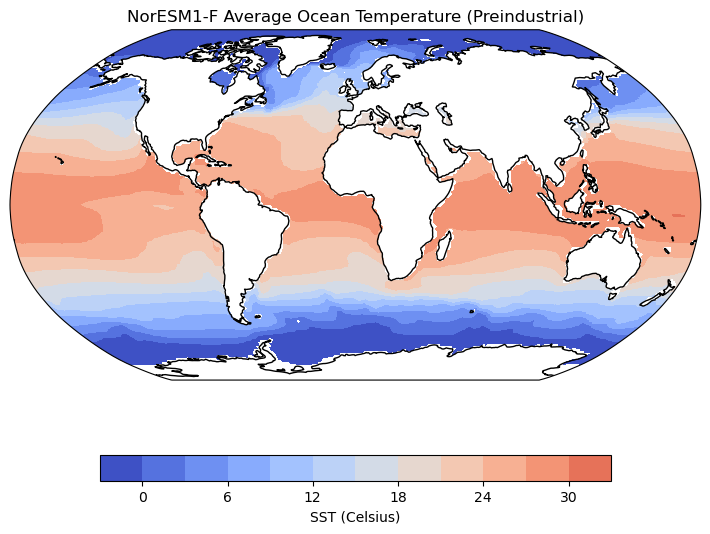

In [29]:
# Specify the file path and name of the dataset
path26 = '/glade/campaign/univ/ugmu0029/PlioMIP2/NorESM1-F/'
fname26 = 'E280_NorESM1-F_thetao.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds26 = xr.open_dataset(path26 + fname26, decode_times=False)

# Rename the variables if necessary
ds26 = ds26.rename({'thetao': 'TEMP', 'depth': 'lev'})

# Squeeze the dimensions to remove any size-1 dimensions
ds26 = ds26.squeeze()

# Create a new dataset for regridding with desired lat and lon coordinates
ds26_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds26, ds26_out, 'nearest_s2d')

# Perform regridding on the TEMP variable and convert to dataset
dr26_out = regridder(ds26['TEMP']).to_dataset(name='TEMP')

# Plotting
plot_projection(
    dr26_out.lon,
    dr26_out.lat,
    dr26_out['TEMP'][0, :, :],
    title="NorESM1-F Average Ocean Temperature (Preindustrial)"
)

# LEEDS MODEL DATA PROCESSING

## LEEDS PLIOCENE

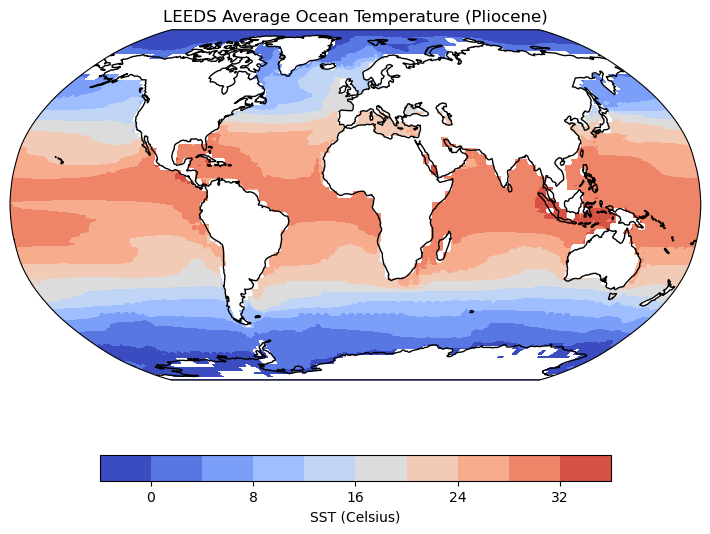

In [30]:
# Setting the file path and name
path27 = '/glade/u/home/nwrye/OceanTemps_Compiles/Preprocessing Notebooks/LEEDS/'
fname27 = 'LEEDS_thetao.nc'

# Open the dataset using xarray and concatenate the dimensions
ds27 = xr.open_dataset(path27 + fname27)

# Renaming variables
ds27 = ds27.rename({'temp_1': 'TEMP','latitude': 'lat','longitude': 'lon', 'depth_1':'lev'})

# Taking temporal and time mean
ds27 = ds27.mean(dim='t')
ds27 = ds27.mean(dim='time')

# Create a new dataset for regridding with desired lat and lon coordinates
ds27_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds27, ds27_out, 'nearest_s2d')

# Perform regridding on the TEMP variable and convert to dataset
dr27_out = regridder(ds27['TEMP']).to_dataset(name='TEMP')

# Plotting
plot_projection(
    dr27_out.lon,
    dr27_out.lat,
    dr27_out['TEMP'][0, :, :],
    title="LEEDS Average Ocean Temperature (Pliocene)"
)

## LEEDS PREINDUSTRIAL

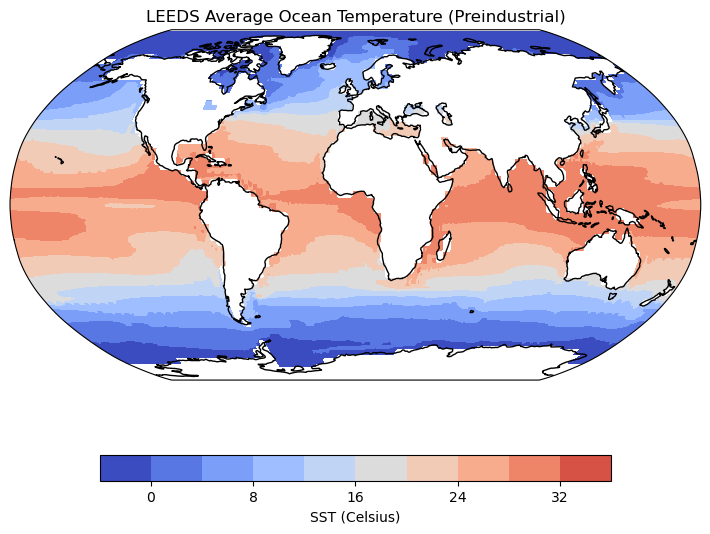

In [31]:
# Setting the file path and name
path28 = '/glade/u/home/nwrye/OceanTemps_Compiles/Preprocessing Notebooks/LEEDS/'
fname28 = 'LEEDS_thetaopi.nc'

# Open the dataset using xarray and concatenate the dimensions
ds28 = xr.open_dataset(path28 + fname28)
ds28 = ds28.rename({'temp_1': 'TEMP','latitude': 'lat','longitude': 'lon', 'depth_1':'lev'})

# Taking temporal and time mean
ds28 = ds28.mean(dim='t')
ds28 = ds28.mean(dim='time')

# Create a new dataset for regridding with desired lat and lon coordinates
ds_out28 = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds28, ds_out28, 'nearest_s2d')

# Perform regridding on the TEMP variable and convert to dataset
dr28_out = regridder(ds28['TEMP']).to_dataset(name='TEMP')

# Plotting
plot_projection(
    dr28_out.lon,
    dr28_out.lat,
    dr28_out['TEMP'][0, :, :],
    title="LEEDS Average Ocean Temperature (Preindustrial)"
)

# SAVING PREPROCESSED DATASETS

In [32]:
# Define the directory path for slice files
path = "/glade/u/home/nwrye/OceanTemps_Compiles/Preprocessed Model Files/"

files = [dr1_out, dr2_out, dr3_out, dr4_out, dr5_out, dr6_out, dr7_out, dr8_out,
         dr9_out, dr10_out, dr11_out, dr12_out, dr13_out, dr14_out, dr15_out, dr16_out, dr17_out,
         dr18_out, dr19_out, dr20_out, dr21_out, dr22_out, dr23_out, dr24_out, dr25_out, dr26_out, dr27_out, dr28_out]

# List of file names to process for plio files and pi files respectively
file_names = [
    "CCSM4_plio.nc",
    "CESM1.2_plio.nc",
    "CESM2_plio.nc",
    "COSMOS_plio.nc",
    "EC_Earth3.3_plio.nc",
    "HADGEM3_NEW_1997_plio.nc",
    "IPSLCM5A_plio.nc",
    "IPSLCM5A2_plio.nc",
    "MIROC4_2004_plio.nc",
    "Utrecht_CESM1.0.5_plio.nc",
    "IPSLCM6A_LR_plio.nc",
    "GISS_plio.nc",
    "NorESM-F_plio.nc",
    "CCSM4_pi.nc",
    "CESM1.2_pi.nc",
    "CESM2_pi.nc",
    "COSMOS_pi.nc",
    "EC_Earth3.3_pi.nc",
    "HADGEM3_NEW_1997_pi.nc",
    "IPSLCM5A_pi.nc",
    "IPSLCM5A2_pi.nc",
    "MIROC4_2004_pi.nc",
    "Utrecht_CESM1.0.5_pi.nc",
    "IPSLCM6A_LR_pi.nc",
    "GISS_pi.nc",
    "NorESM-F_pi.nc",
    "LEEDS_plio.nc",
    "LEEDS_pi.nc"
]

# Assuming files are loaded and stored as xarray datasets, you should have the files dictionary here

for file, filename in zip(files, file_names):
    # Construct the output filename
    output_filename = path + filename
    
    # Save the dataset to a NetCDF file
    file.to_netcdf(output_filename)
    print("Saved:", output_filename) 

Saved: /glade/u/home/nwrye/OceanTemps_Compiles/Preprocessed Model Files/CCSM4_plio.nc
Saved: /glade/u/home/nwrye/OceanTemps_Compiles/Preprocessed Model Files/CESM1.2_plio.nc
Saved: /glade/u/home/nwrye/OceanTemps_Compiles/Preprocessed Model Files/CESM2_plio.nc
Saved: /glade/u/home/nwrye/OceanTemps_Compiles/Preprocessed Model Files/COSMOS_plio.nc
Saved: /glade/u/home/nwrye/OceanTemps_Compiles/Preprocessed Model Files/EC_Earth3.3_plio.nc
Saved: /glade/u/home/nwrye/OceanTemps_Compiles/Preprocessed Model Files/HADGEM3_NEW_1997_plio.nc
Saved: /glade/u/home/nwrye/OceanTemps_Compiles/Preprocessed Model Files/IPSLCM5A_plio.nc
Saved: /glade/u/home/nwrye/OceanTemps_Compiles/Preprocessed Model Files/IPSLCM5A2_plio.nc
Saved: /glade/u/home/nwrye/OceanTemps_Compiles/Preprocessed Model Files/MIROC4_2004_plio.nc
Saved: /glade/u/home/nwrye/OceanTemps_Compiles/Preprocessed Model Files/Utrecht_CESM1.0.5_plio.nc
Saved: /glade/u/home/nwrye/OceanTemps_Compiles/Preprocessed Model Files/IPSLCM6A_LR_plio.nc
Sav